In [50]:
!unzip '/content/dataset2.zip'

Archive:  /content/dataset2.zip
   creating: dataset1/
   creating: dataset1/test/
   creating: dataset1/test/with mask/
  inflating: dataset1/test/with mask/augmented_image_100.jpg  
  inflating: dataset1/test/with mask/augmented_image_101.jpg  
  inflating: dataset1/test/with mask/augmented_image_102.jpg  
  inflating: dataset1/test/with mask/augmented_image_103.jpg  
  inflating: dataset1/test/with mask/augmented_image_113.jpg  
  inflating: dataset1/test/with mask/augmented_image_114.jpg  
  inflating: dataset1/test/with mask/augmented_image_115.jpg  
  inflating: dataset1/test/with mask/augmented_image_116.jpg  
  inflating: dataset1/test/with mask/augmented_image_126.jpg  
  inflating: dataset1/test/with mask/augmented_image_127.jpg  
  inflating: dataset1/test/with mask/augmented_image_128.jpg  
  inflating: dataset1/test/with mask/augmented_image_129.jpg  
  inflating: dataset1/test/with mask/augmented_image_139.jpg  
  inflating: dataset1/test/with mask/augmented_image_140.jpg

DATA PREPROCESSING

In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np

In [53]:

train_gen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True,shear_range =0.2)

In [54]:
test_gen = ImageDataGenerator(rescale = 1./255,preprocessing_function=rgb_to_grayscale)

In [55]:
#Merge the test data
train = train_gen.flow_from_directory('/content/dataset1/train',target_size= (120,120),class_mode = 'categorical',batch_size=2)
test = test_gen.flow_from_directory('/content/dataset1/test',target_size=(120,120),class_mode='categorical',batch_size=2)

Found 1249 images belonging to 2 classes.
Found 127 images belonging to 2 classes.


In [56]:
train.class_indices

{'with mask': 0, 'without mask': 1}

CNN MODEL

In [57]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [58]:
from tensorflow.keras.models import Sequential
asish_model = Sequential()
asish_model.add(Convolution2D(20,(3,3),activation = 'relu',input_shape=(120,120,3)))
asish_model.add(MaxPooling2D(pool_size=(2,2)))
asish_model.add(Flatten())
asish_model.add(Dense(45,activation='relu'))
asish_model.add(Dense(2,activation='sigmoid'))



In [59]:
asish_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


Training the model

In [61]:
asish_model.fit(train,batch_size=2,validation_data=test,epochs=30)
asish_model.save('face_detection.h5')

Epoch 1/30
625/625 [==============================] - 11s 18ms/step - loss: 0.0294 - accuracy: 0.9896 - val_loss: 0.7730 - val_accuracy: 0.7874
Epoch 2/30
625/625 [==============================] - 11s 18ms/step - loss: 0.0259 - accuracy: 0.9920 - val_loss: 1.4629 - val_accuracy: 0.7008
Epoch 3/30
625/625 [==============================] - 11s 18ms/step - loss: 0.0305 - accuracy: 0.9880 - val_loss: 0.5869 - val_accuracy: 0.7953
Epoch 4/30
625/625 [==============================] - 11s 18ms/step - loss: 0.0323 - accuracy: 0.9912 - val_loss: 0.4336 - val_accuracy: 0.8346
Epoch 5/30
625/625 [==============================] - 11s 18ms/step - loss: 0.0193 - accuracy: 0.9960 - val_loss: 0.3548 - val_accuracy: 0.8740
Epoch 6/30
625/625 [==============================] - 11s 18ms/step - loss: 0.0043 - accuracy: 0.9992 - val_loss: 0.8508 - val_accuracy: 0.8268
Epoch 7/30
625/625 [==============================] - 11s 18ms/step - loss: 0.0453 - accuracy: 0.9856 - val_loss: 0.5068 - val_accuracy:

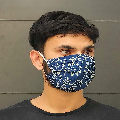

In [62]:
#testing
import numpy as np
from tensorflow.keras.preprocessing import image
# Testing 1
img1 = image.load_img('/content/test1.jpg',target_size=(120,120))
img1



In [64]:
reshaped_img = np.reshape(img1, (120, 120, 3))
reshaped_img = np.expand_dims(reshaped_img,axis=0)
pred = np.argmax(asish_model.predict(reshaped_img))
print(pred)
output=['with mask','without mask']
print(output[pred])

1/1 [==============================] - 0s 92ms/step
0
with mask


Testing the model